# Linear Regression

In [1]:
# This will download file Combine_Temp.csv from Github 
import requests 

csv_url = "https://raw.githubusercontent.com/stm5131/nsfcybertraining/main/Data_Analytics_3/Combine_Temp.csv" # donwloading raw url

response = requests.get(csv_url) 

if response.status_code == 200: 

    with open('Combine_Temp.csv', 'wb') as f: 
        f.write(response.content) 
        print("File downloaded successfully.") 
else: 
    print('Failed to download file.') 

File downloaded successfully.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
#Read file
Combine = pd.read_csv("Combine_Temp.csv")

In [4]:
x= Combine.Place1
y= Combine.Place2

In [5]:
#Execute a method that returns some important key values of Linear Regression:
slope, intercept, r, p, std_err = stats.linregress(x, y)

In [6]:
print('slope: '+ str(slope))
print('intercept: '+ str(intercept))
print('r: '+ str(r))
print('p: '+ str(p))
print('std_err: '+ str(std_err))


slope: 0.8707806450026643
intercept: 5.90280177647773
r: 0.9649558204474692
p: 1.4021581516525898e-213
std_err: 0.01241180629081054


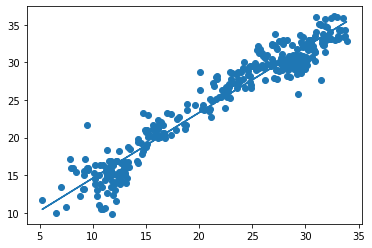

In [7]:
#Create a function that uses the slope and intercept values to return a new value. 
#This new value represents where on the y-axis the corresponding x value will be placed:
def myfunc(x):
  return slope * x + intercept

#Run each value of the x array through the function. This will result in a new array with new values for the y-axis:
mymodel = list(map(myfunc, x))

#Draw the original scatter plot:
plt.scatter(x, y)
#Draw the line of linear regression:
plt.plot(x, mymodel)
#Display the plot:
plt.show()

# Linear Regression in Python using Statsmodels

In [8]:
import statsmodels.api as sm

In [9]:
print(x)

0      10.360620
1      11.335141
2      10.641355
3      10.939014
4      10.779754
         ...    
361    13.220231
362    13.058278
363    11.479607
364    12.511313
365    12.923061
Name: Place1, Length: 366, dtype: float64


In [10]:
# Adding a constant which will be predicted later.
x = sm.add_constant(x)
print(x)

     const     Place1
0      1.0  10.360620
1      1.0  11.335141
2      1.0  10.641355
3      1.0  10.939014
4      1.0  10.779754
..     ...        ...
361    1.0  13.220231
362    1.0  13.058278
363    1.0  11.479607
364    1.0  12.511313
365    1.0  12.923061

[366 rows x 2 columns]


In [11]:
print(y)

0      12.317489
1      12.629601
2      11.050880
3      10.505939
4      10.579117
         ...    
361    14.653311
362    15.054744
363    15.605073
364    15.489469
365    15.630150
Name: Place2, Length: 366, dtype: float64


In [12]:
# Using Ordinary Least Squares (OLS) modelling approach 
model = sm.OLS(y, x).fit() 
print(model)

In [13]:
predictions = model.predict(x) 
print(predictions)

0      14.924630
1      15.773223
2      15.169087
3      15.428284
4      15.289603
         ...    
361    17.414723
362    17.273698
363    15.899021
364    16.797411
365    17.155953
Length: 366, dtype: float64


In [14]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                 Place2   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     4922.
Date:                Wed, 24 May 2023   Prob (F-statistic):          1.40e-213
Time:                        11:02:54   Log-Likelihood:                -745.87
No. Observations:                 366   AIC:                             1496.
Df Residuals:                     364   BIC:                             1504.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.9028      0.290     20.324      0.0

# Interpretation
    1. Adjusted R-squared reflects the fit of the model. R-squared values range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met. Const coefficient is your Y-intercept.
    2. Std err reflects the level of accuracy of the coefficients. The lower it is, the higher is the level of accuracy.
    3. P >|t| is your p-value. A p-value of less than 0.05 is considered to be statistically significant.
    4. Confidence Interval represents the range in which our coefficients are likely to fall (with a likelihood of 95%).